# Breast Cancer Dataset 

## Creating a neural network for  classification 

Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Exploratory Data Analysis

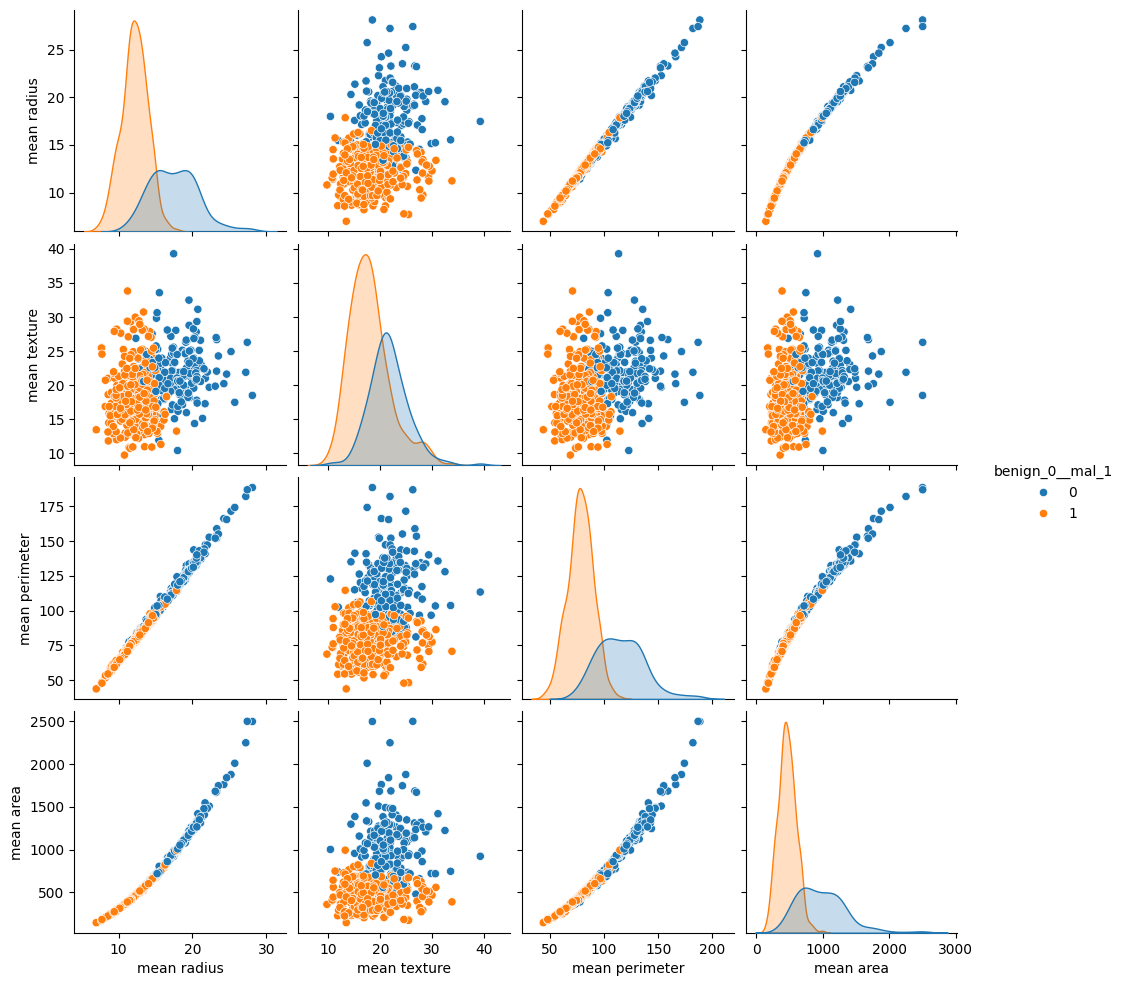

In [5]:
# Select columns for pairplot
columns_for_pairplot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'benign_0__mal_1']

# Create pairplot
sns.pairplot(df[columns_for_pairplot], hue='benign_0__mal_1', diag_kind='kde')


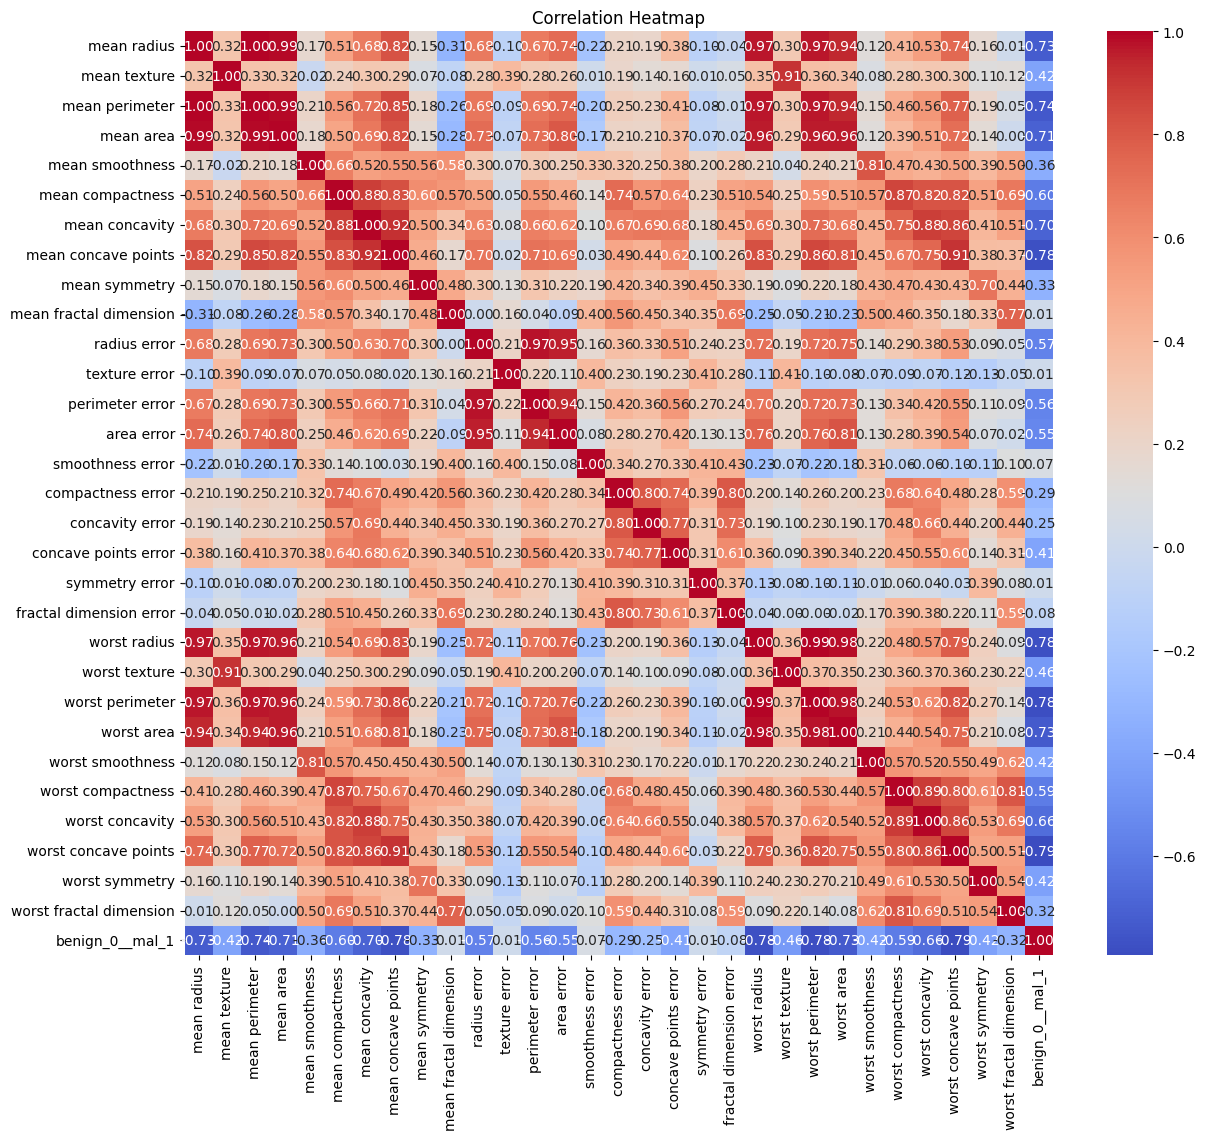

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create larger heatmap
plt.figure(figsize=(14, 12))  # Adjust the width and height here
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


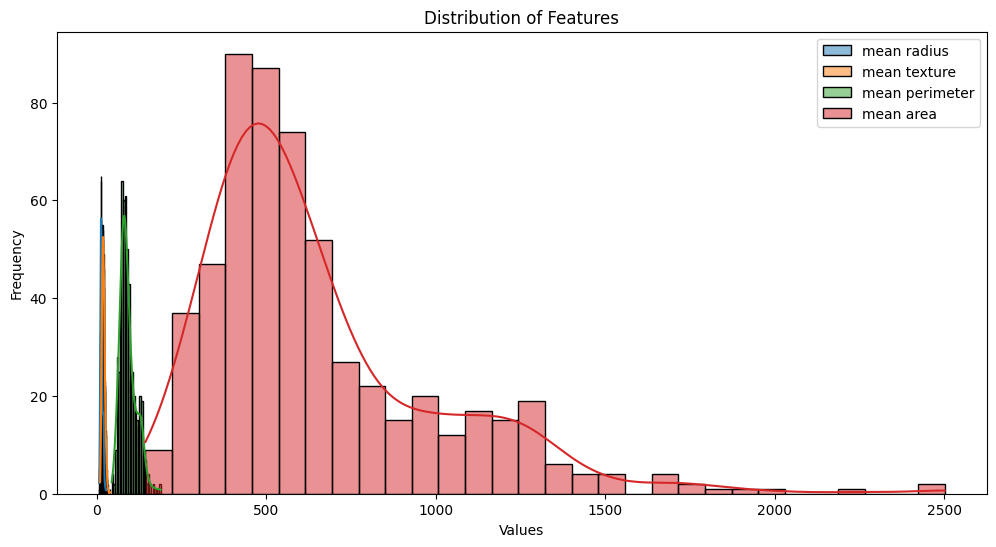

In [8]:
# Select columns for distribution plot
columns_for_distribution = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

# Create distribution plot
plt.figure(figsize=(12, 6))
for col in columns_for_distribution:
    sns.histplot(df[col], kde=True, bins=30, alpha=0.5, label=col)
plt.legend()
plt.title('Distribution of Features')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

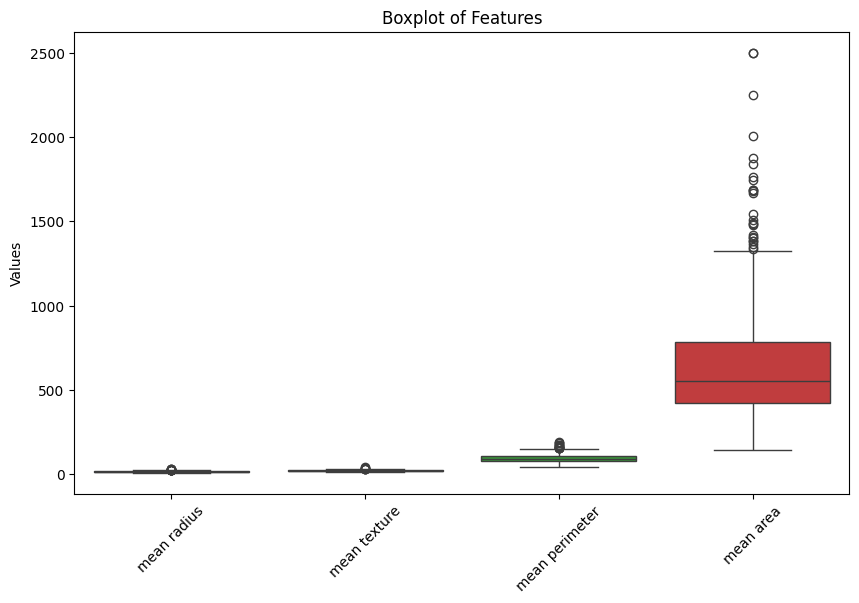

In [9]:
# Select columns for boxplot
columns_for_boxplot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_for_boxplot])
plt.title('Boxplot of Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Splitting the data

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scaling the Data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Building the Neural Network

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [17]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/300
14/14 [==============================] - 0s 6ms/step - loss: 0.7294 - accuracy: 0.4718 - val_loss: 0.5807 - val_accuracy: 0.5734
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7700 - val_loss: 0.4370 - val_accuracy: 0.8462
Epoch 3/300
14/14 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.9155 - val_loss: 0.3552 - val_accuracy: 0.9161
Epoch 4/300
14/14 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.9554 - val_loss: 0.2978 - val_accuracy: 0.9371
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9624 - val_loss: 0.2498 - val_accuracy: 0.9441
Epoch 6/300
14/14 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9624 - val_loss: 0.2094 - val_accuracy: 0.9441
Epoch 7/300
14/14 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9624 - val_loss: 0.1789 - val_accuracy: 0.9441
Epoch 8/300
1

## Graphs

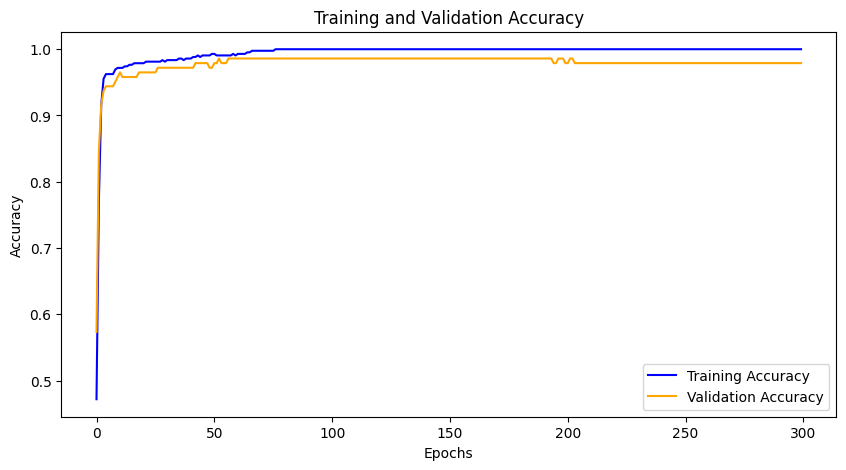

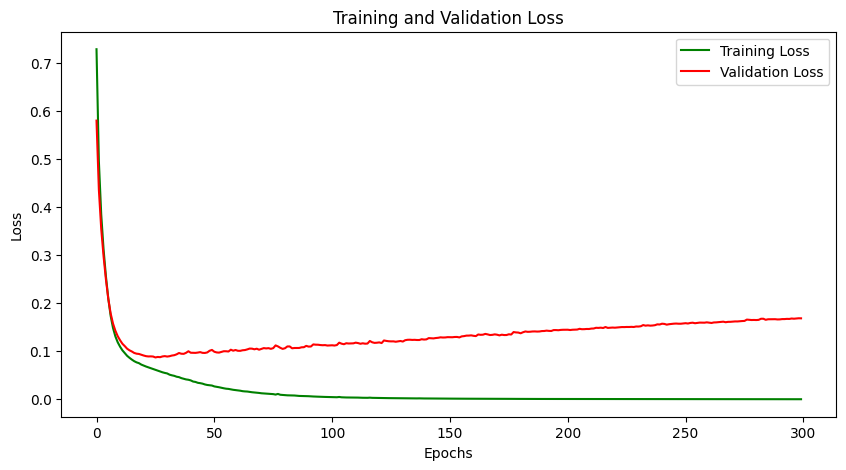

In [22]:
# Get training history
train_accuracy = model.history.history['accuracy']
val_accuracy =model. history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='green')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Using Early Stopping this time

In [23]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [26]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8976 - accuracy: 0.3310 - val_loss: 0.7356 - val_accuracy: 0.4336
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.5751 - val_loss: 0.5393 - val_accuracy: 0.7063
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8263 - val_loss: 0.4103 - val_accuracy: 0.9091
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.9202 - val_loss: 0.3083 - val_accuracy: 0.9441
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9507 - val_loss: 0.2320 - val_accuracy: 0.9580
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9577 - val_loss: 0.1868 - val_accuracy: 0.9580
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9695 - val_loss: 0.1589 - val_accuracy: 0.9720
Epoch 8/500
1

## Accuracy vs Val_accuracy

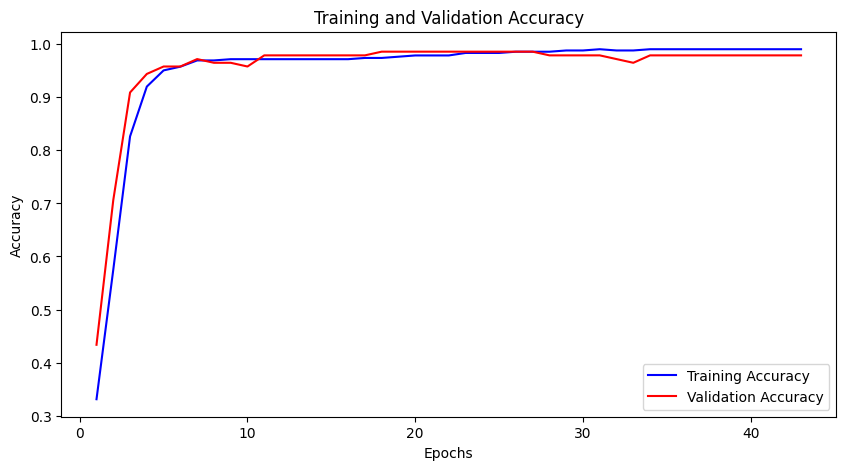

In [28]:
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss vs Val_loss

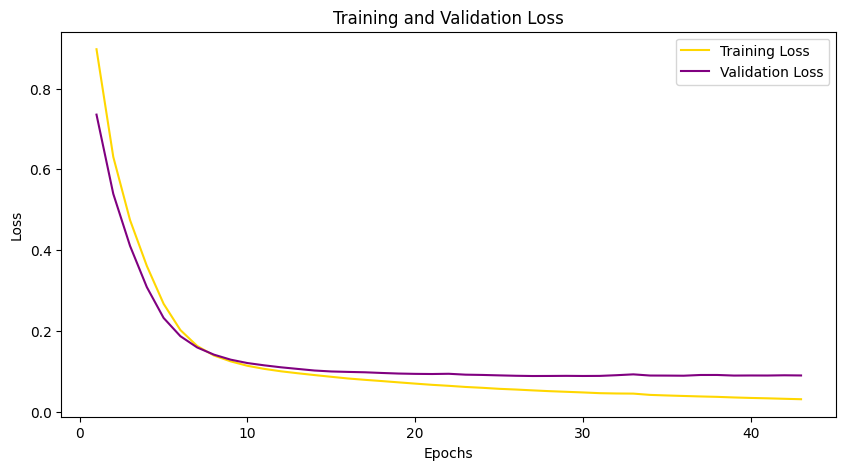

In [30]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'gold', label='Training Loss')
plt.plot(epochs, val_loss, 'purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Adding Dropout Layers this time

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
help(Dropout)

Help on class Dropout in module keras.src.layers.regularization.dropout:

class Dropout(keras.src.engine.base_layer.BaseRandomLayer)
 |  Dropout(rate, noise_shape=None, seed=None, **kwargs)
 |  
 |  Applies Dropout to the input.
 |  
 |  The Dropout layer randomly sets input units to 0 with a frequency of `rate`
 |  at each step during training time, which helps prevent overfitting.
 |  Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
 |  all inputs is unchanged.
 |  
 |  Note that the Dropout layer only applies when `training` is set to True
 |  such that no values are dropped during inference. When using `model.fit`,
 |  `training` will be appropriately set to True automatically, and in other
 |  contexts, you can set the kwarg explicitly to True when calling the layer.
 |  
 |  (This is in contrast to setting `trainable=False` for a Dropout layer.
 |  `trainable` does not affect the layer's behavior, as Dropout does
 |  not have any variables/weights that can

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7335 - accuracy: 0.5822 - val_loss: 0.5407 - val_accuracy: 0.8462
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.6643 - val_loss: 0.4563 - val_accuracy: 0.9091
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7300 - val_loss: 0.3936 - val_accuracy: 0.9510
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7817 - val_loss: 0.3418 - val_accuracy: 0.9580
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8052 - val_loss: 0.2981 - val_accuracy: 0.9580
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8146 - val_loss: 0.2589 - val_accuracy: 0.9580
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8380 - val_loss: 0.2295 - val_accuracy: 0.9580
Epoch 8/600
1

## Accuracy vs Val_accuracy

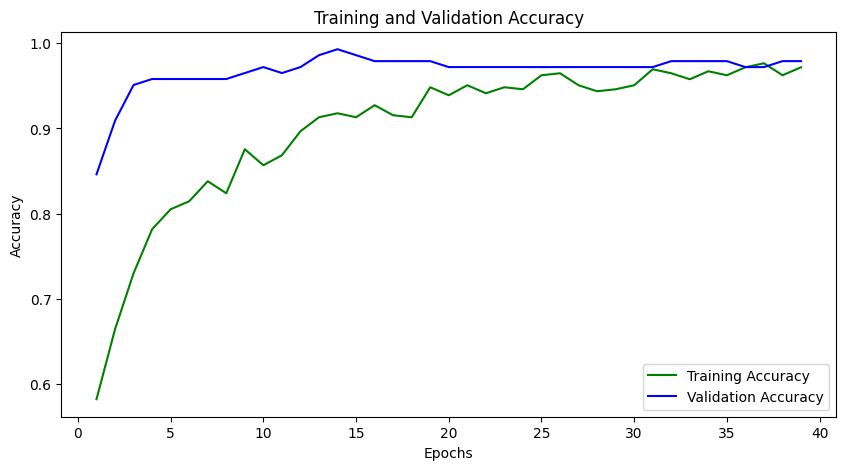

In [35]:
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')  # Green color for training accuracy
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')   # Blue color for validation accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss vs Val_loss

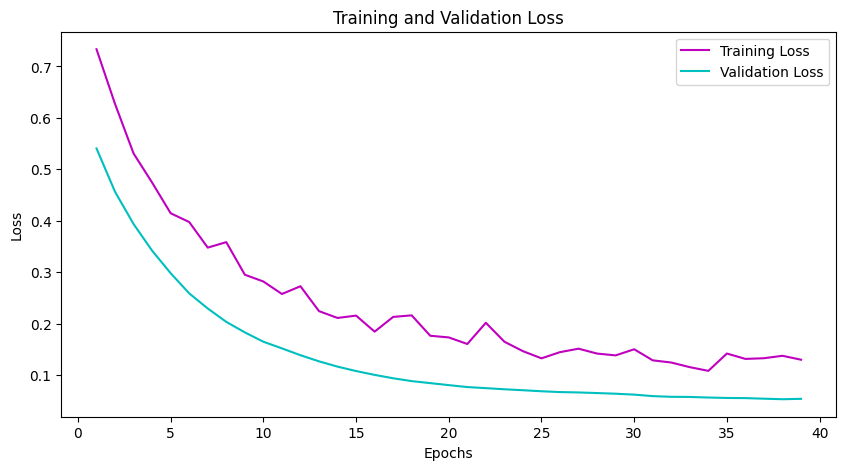

In [36]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'm', label='Training Loss')   # Magenta color for training loss
plt.plot(epochs, val_loss, 'c', label='Validation Loss')  # Cyan color for validation loss
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()